In [120]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns = None # affiche toutes les colonnes lors de l'affichage des DataFrames
pd.options.display.float_format = '{:.2f}'.format # affiche les nombres à virgule flottante avec 2 décimales

In [121]:
df = pd.read_parquet("../data/2-clean/slo_2024.parquet")

In [122]:
# Ajout de colonnes simplifiées : True si le train a plus de n minutes de retard à l'arrivée
df['ret_arrivee_5min'] = df['ret_arrivee_obs_min'] >= 5
df['ret_arrivee_10min'] = df['ret_arrivee_obs_min'] >= 10
df['ret_arrivee_15min'] = df['ret_arrivee_obs_min'] >= 15

In [123]:
# top 10 des plus grands retards à l'arrivée : 
df.sort_values(by='ret_arrivee_obs_min', ascending=False).head() 

,id_circ,date_circ,num_marche,code_ci_origine,lib_ci_origine,code_ci_destination,lib_ci_destination,lib_ui,lib_tct_depart,lib_tct_arrivee,id_engin_depart,id_engin_arrivee,depart_theorique,depart_observe,depart_estime,arrivee_theorique,arrivee_observe,arrivee_estime,distance_totale,ret_depart_obs_sec,ret_depart_obs_min,ret_arrivee_obs_sec,ret_arrivee_obs_min,ret_arrivee_obs_cat,duree_theorique_min,duree_theorique_cat,duree_observee_min,mois,jour_semaine,heure_depart,heure_arrivee,ret_arrivee_5min,ret_arrivee_10min,ret_arrivee_15min
99400,85272125,2024-05-24,5224,286005,Lille-Flandres,481002,Nantes,SNCF-VOYAGES,"TAGV - Nord, à charge","TAGV - Nord, à charge",TGVPOS,TGVPOS,2024-05-23 09:36:00,2024-05-24 09:35:46,2024-05-24 09:35:46,2024-05-23 14:44:00,2024-05-24 14:41:04,2024-05-24 14:41:04,704196,86386.00,1439.77,86224.00,1437.07,[60+],308.00,>3h,305.30,5,4,9,14,True,True,True
63797,84338849,2024-04-03,8537,391003,Paris-Montparnasse,677005,Hendaye,SNCF-VOYAGES,"TAGV - Atlantique, à charge","TAGV - Atlantique, à charge",TGV2N2,TGV2N2,2024-04-03 10:04:00,2024-04-03 10:03:20,2024-04-03 10:03:20,2024-04-03 14:47:00,2024-04-04 02:27:00,2024-04-04 02:27:00,769999,-40.00,-0.67,42000.00,700.00,[60+],283.00,>3h,983.67,4,2,10,2,True,True,True
159272,86872362,2024-08-17,4080,481002,Nantes,484006,Angers-St-Laud,OSLO,"GL Inter-Villes - Train classique, VL>= 160 km/h","GL Inter-Villes - Train classique, VL>= 160 km/h",22200,22200,2024-08-17 06:40:00,2024-08-17 06:39:37,2024-08-17 06:39:37,2024-08-17 07:22:00,2024-08-17 18:15:42,2024-08-17 18:15:42,87422,-23.00,-0.38,39222.00,653.70,[60+],42.00,<1h30,696.08,8,5,6,18,True,True,True
144775,86491551,2024-07-26,7668,286542,Tourcoing,581009,Bordeaux-St-Jean,SNCF-VOYAGES,"TAGV haute capacité Nord, à charge","TAGV haute capacité Nord, à charge",TGVDAS,TGVDAS,2024-07-26 06:02:00,2024-07-26 10:42:00,2024-07-26 10:42:00,2024-07-26 11:02:00,2024-07-26 21:16:13,2024-07-26 21:16:13,918736,16800.00,280.00,36853.00,614.22,[60+],300.00,>3h,634.22,7,4,10,21,True,True,True
144553,86489397,2024-07-26,5260,581009,Bordeaux-St-Jean,286005,Lille-Flandres,SNCF-VOYAGES,"TAGV - Nord, à charge","TAGV - Nord, à charge",TGVPOS,TGVPOS,2024-07-26 05:58:00,2024-07-26 05:58:01,2024-07-26 05:58:01,2024-07-26 10:42:00,2024-07-26 20:31:13,2024-07-26 20:31:13,888008,1.00,0.02,35353.00,589.22,[60+],284.00,>3h,873.20,7,4,5,20,True,True,True


In [124]:
# on va ignorer le retard > 1400 minutes, c'est aberrant et ça casse tous les graphiques après
df = df[df['ret_arrivee_obs_min'] <= 1400]

In [125]:
# top 10 des plus grandes avances au départ
df.sort_values(by='ret_depart_obs_min', ascending=True).head() 

,id_circ,date_circ,num_marche,code_ci_origine,lib_ci_origine,code_ci_destination,lib_ci_destination,lib_ui,lib_tct_depart,lib_tct_arrivee,id_engin_depart,id_engin_arrivee,depart_theorique,depart_observe,depart_estime,arrivee_theorique,arrivee_observe,arrivee_estime,distance_totale,ret_depart_obs_sec,ret_depart_obs_min,ret_arrivee_obs_sec,ret_arrivee_obs_min,ret_arrivee_obs_cat,duree_theorique_min,duree_theorique_cat,duree_observee_min,mois,jour_semaine,heure_depart,heure_arrivee,ret_arrivee_5min,ret_arrivee_10min,ret_arrivee_15min
29742,83385299,2024-02-11,6124,751081,Marseille-Blancarde,686006,Paris-Gare-de-Lyon,SNCF-VOYAGES,"TAGV - Sud-Est, à charge","TAGV - Sud-Est, à charge",TGV-D,TGV-D,2024-02-11 15:46:00,2024-02-10 15:32:28,2024-02-10 15:32:28,2024-02-11 19:23:00,2024-02-11 19:26:51,2024-02-11 19:26:51,753375,-87212.00,-1453.53,231.00,3.85,"[0,5[",217.00,>3h,1674.38,2,6,15,19,False,False,False
67789,84446252,2024-04-08,6689,722439,Givors-Canal,726000,St-Étienne-Châteaucreux,SNCF-VOYAGES,"TAGV - Sud-Est, à charge","TAGV - Sud-Est, à charge",TGV-D,TGV-D,2024-04-08 21:22:30,2024-04-08 06:35:59,2024-04-08 06:35:59,2024-04-08 21:48:00,2024-04-08 21:48:16,2024-04-08 21:48:16,37127,-53191.00,-886.52,16.00,0.27,"[0,5[",25.50,<1h30,912.28,4,0,6,21,False,False,False
97350,85213756,2024-05-21,7106,343004,Valenciennes,271007,Paris-Nord,SNCF-VOYAGES,"TAGV - Nord, à charge","TAGV - Nord, à charge",TGV-D,TGV-D,2024-05-21 06:57:00,2024-05-20 20:16:49,2024-05-20 20:16:49,2024-05-21 08:49:00,2024-05-21 08:50:24,2024-05-21 08:50:24,239453,-38411.00,-640.18,84.00,1.40,"[0,5[",112.00,1h30-3h,753.58,5,1,20,8,False,False,False
22249,83177938,2024-02-03,6250,688887,Montpellier (CNM),686006,Paris-Gare-de-Lyon,SNCF-VOYAGES,"TAGV - Sud-Est, à charge","TAGV - Sud-Est, à charge",TGV-D,TGV-D,2024-02-03 07:52:00,2024-02-02 22:40:27,2024-02-02 22:40:27,2024-02-03 11:04:00,2024-02-03 11:20:57,2024-02-03 11:20:57,731079,-33093.00,-551.55,1017.00,16.95,"[15,30[",192.00,>3h,760.50,2,5,22,11,True,True,True
101138,85319775,2024-05-26,6180,756056,Nice-Ville,686006,Paris-Gare-de-Lyon,SNCF-VOYAGES,"TAGV - Sud-Est, à charge","TAGV - Sud-Est, à charge",TGV-D,TGV-D,2024-05-26 16:58:00,2024-05-26 07:57:55,2024-05-26 07:57:55,2024-05-26 22:38:00,2024-05-26 23:13:59,2024-05-26 23:13:59,971692,-32405.00,-540.08,2159.00,35.98,"[30,60[",340.00,>3h,916.07,5,6,7,23,True,True,True


Text(0.5, 1.0, "Répartition des retards à l'arrivée selon la durée du trajet")

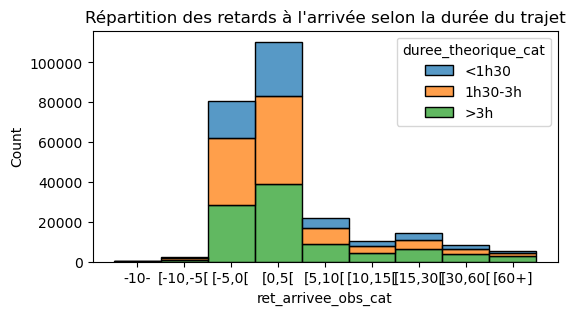

In [126]:
# Répartition des retards à l'arrivée selon la durée du trajet
plt.figure(figsize=(6,3))
sns.histplot(data=df, x="ret_arrivee_obs_cat", hue="duree_theorique_cat", multiple="stack", stat="count")
plt.title("Répartition des retards à l'arrivée selon la durée du trajet")

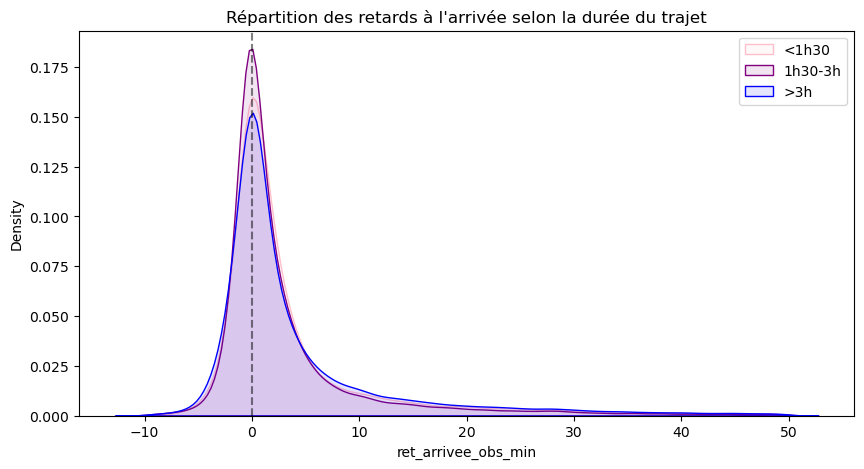

In [127]:
# Répartition des retards à l'arrivée selon la durée du Trajet
plt.figure(figsize=(10,5))
sns.kdeplot(data=df[(df['ret_arrivee_obs_min'] >= -10) & (df['ret_arrivee_obs_min'] <= 50) & (df['duree_theorique_cat'] == '<1h30')], x='ret_arrivee_obs_min', fill=True, color='pink', alpha=0.1)
sns.kdeplot(data=df[(df['ret_arrivee_obs_min'] >= -10) & (df['ret_arrivee_obs_min'] <= 50) & (df['duree_theorique_cat'] == '1h30-3h')], x='ret_arrivee_obs_min', fill=True, color='purple', alpha=0.1)
sns.kdeplot(data=df[(df['ret_arrivee_obs_min'] >= -10) & (df['ret_arrivee_obs_min'] <= 50) & (df['duree_theorique_cat'] == '>3h')], x='ret_arrivee_obs_min', fill=True, color='blue', alpha=0.1)
plt.legend(['<1h30', '1h30-3h', '>3h'])
plt.title("Répartition des retards à l'arrivée selon la durée du trajet")
plt.axvline(x=0, color='k', linestyle='--', alpha=0.5)

# constat : les trains de 3 h sont légèrement plus en retard (autant au départ qu'à l'arrivée), mais c'est subtil

Text(0.5, 1.0, "Répartition des retards à l'arrivée (entre -10 min et +50 min)")

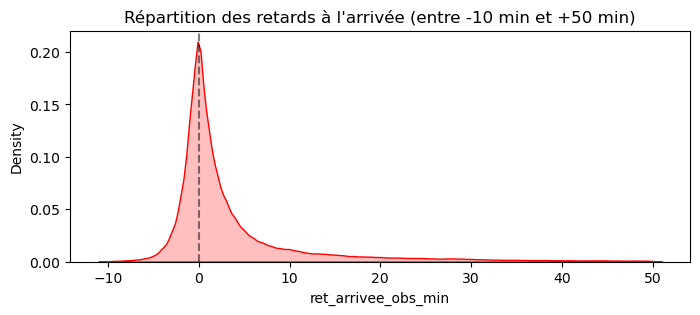

In [128]:
# Réparatition des retards à l'arrivée
plt.figure(figsize=(8,3))
sns.kdeplot(data=df[(df['ret_arrivee_obs_min'] >= -10) & (df['ret_arrivee_obs_min'] <= 50)]['ret_arrivee_obs_min'], fill=True, bw_adjust=0.5, color='r')
plt.axvline(x=0, color='k', linestyle='--', alpha=0.5)
plt.title("Répartition des retards à l'arrivée (entre -10 min et +50 min)")

Text(0.5, 1.0, 'Répartition des retards au DEPART (entre -10 min et +50 min)')

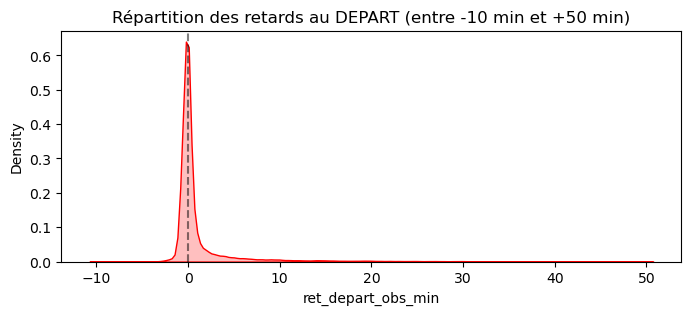

In [129]:
# Réparatition des retards au départ
plt.figure(figsize=(8,3))
sns.kdeplot(df[(df['ret_depart_obs_min'] >= -10) & (df['ret_depart_obs_min'] <= 50)]['ret_depart_obs_min'], fill=True, bw_adjust=0.5, color='r')
plt.axvline(x=0, color='k', linestyle='--', alpha=0.5)
plt.title("Répartition des retards au DEPART (entre -10 min et +50 min)")
# constat : les trains sont nettement plus ponctuels au départ qu'à l'arrivée (cloche plus resserée et pic à 0.6 sur x=0, contre seulement 0.2 à l'arrivée)

In [130]:
# calcul de la corrélation entre duree_theorique_min et ret_arrivee_obs_min
df[['duree_theorique_min', 'ret_arrivee_obs_min']].corr()
# constat : aucune corrélation entre durée du trajet et retard

,duree_theorique_min,ret_arrivee_obs_min
duree_theorique_min,1.00,0.06
ret_arrivee_obs_min,0.06,1.00


<Axes: xlabel='duree_theorique_min', ylabel='ret_arrivee_obs_min'>

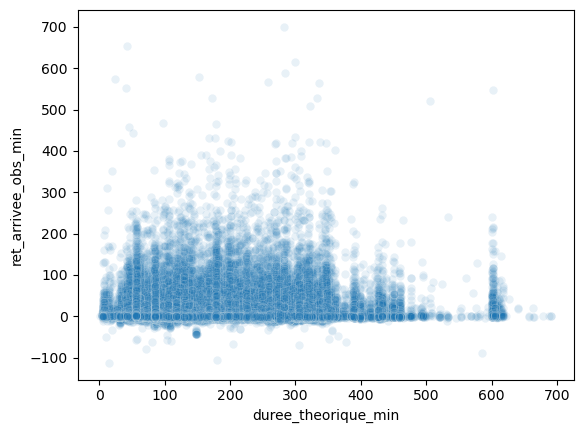

In [131]:
# Répartition des retards selon la durée du trajet (scatterplot)
sns.scatterplot(data=df, x="duree_theorique_min", y="ret_arrivee_obs_min", alpha=0.1)
# constat : aucune corrélation entre durée du trajet et retard

Text(0.5, 1.0, "Nombre de trains par heure d'arrivée et par catégorie de retard à l'arrivée")

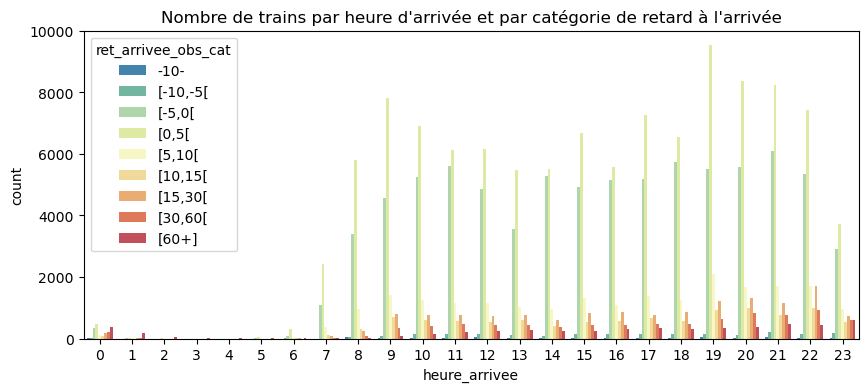

In [132]:
# Affiche le nombre de ret_arrivee_obs_cat par heure_arrivee
palette = sns.color_palette("Spectral", n_colors=len(df['ret_arrivee_obs_cat'].cat.categories))[::-1]
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='heure_arrivee', hue='ret_arrivee_obs_cat', palette=palette)
plt.title("Nombre de trains par heure d'arrivée et par catégorie de retard à l'arrivée")

Text(0.5, 1.0, "Nombre de trains par mois et par catégorie de retard à l'arrivée")

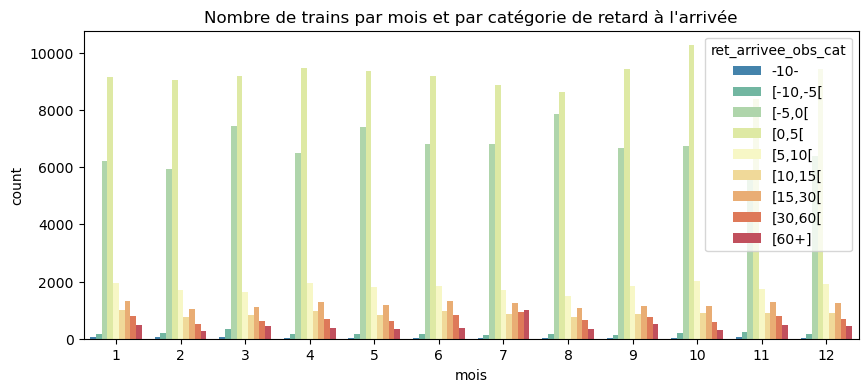

In [133]:
# Affiche le nombre de ret_arrivee_obs_cat par mois
palette = sns.color_palette("Spectral", n_colors=len(df['ret_arrivee_obs_cat'].cat.categories))[::-1]
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='mois', hue='ret_arrivee_obs_cat', palette=palette)
plt.title("Nombre de trains par mois et par catégorie de retard à l'arrivée")

<Axes: xlabel='heure_arrivee_str', ylabel='taux_retard'>

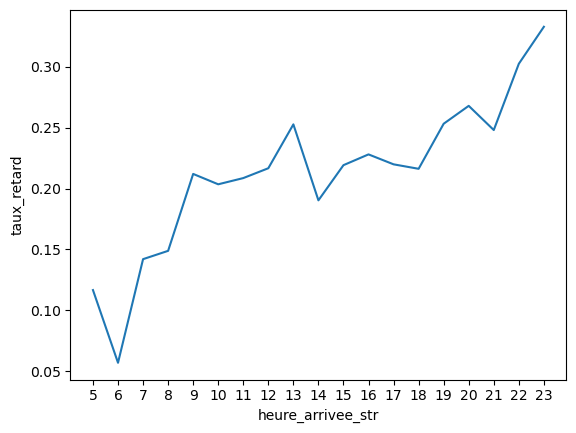

In [134]:
# Taux de retard à l'arrivée au seuil de 5 minutes, par heure_arrivee
taux_retard_arrivee = pd.DataFrame({
    'heure_arrivee': np.arange(0, 24),
    'heure_arrivee_str': np.arange(0, 24).astype(str),
    'nb_trains' : df.groupby('heure_arrivee').size().tolist(),
    'nb_retards' : df[df['ret_arrivee_obs_min'] > 5].groupby('heure_arrivee').size().tolist()
})
taux_retard_arrivee['taux_retard'] = taux_retard_arrivee['nb_retards'] / taux_retard_arrivee['nb_trains']
sns.lineplot(data=taux_retard_arrivee[taux_retard_arrivee['heure_arrivee'] >= 5], x='heure_arrivee_str', y='taux_retard')

<Axes: xlabel='mois', ylabel='ret_arrivee_5min'>

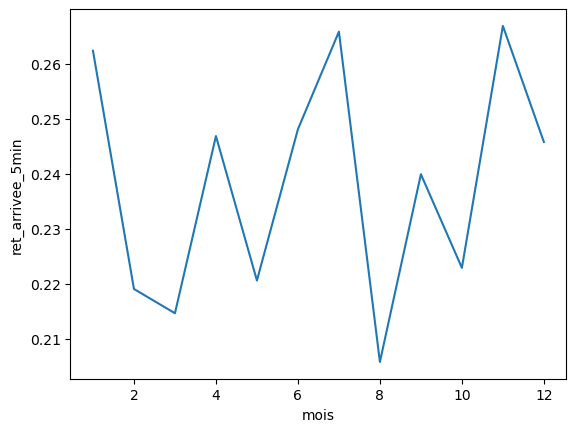

In [135]:
# Evolution des retards au cours de l'année
retard_5min_mensuel = df.groupby('mois')['ret_arrivee_5min'].mean()
sns.lineplot(data=retard_5min_mensuel)

Text(0.5, 1.0, "Retard moyen à l'arrivée selon l'heure d'arrivée")

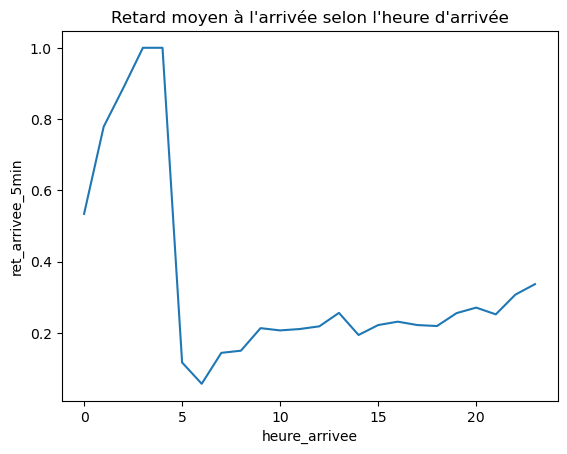

In [146]:
# Evolution des retards à l'arrivée au cours de la journée
retard_5min_horaire = df.groupby('heure_arrivee')['ret_arrivee_5min'].mean()
sns.lineplot(data=retard_5min_horaire)  
plt.title("Retard moyen à l'arrivée selon l'heure d'arrivée")

# note qui explique peut-être la différence avec les réusltats présentés par Le Monde : je considère uniquement les terminus, pas les arrêts intermédiaires.

Text(0.5, 1.0, "Retard moyen à l'arrivée selon l'heure de départ")

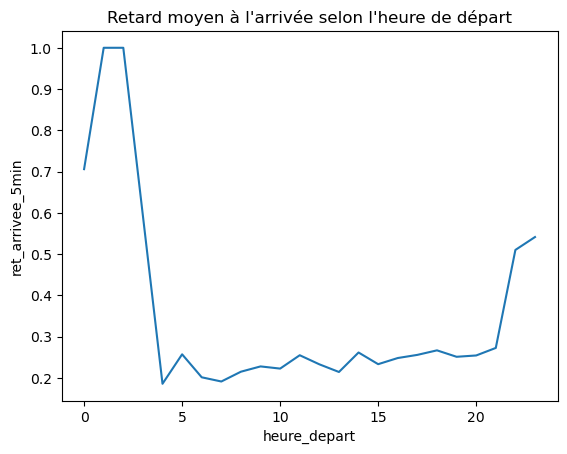

In [145]:
# Même chose, mais avec l'heure de départ
retard_5min_horaire = df.groupby('heure_depart')['ret_arrivee_5min'].mean()
sns.lineplot(data=retard_5min_horaire) 
plt.title("Retard moyen à l'arrivée selon l'heure de départ")

In [138]:
# gares d'arrivée les plus populaires
df['lib_ci_destination'].value_counts()

lib_ci_destination
Paris-Gare-de-Lyon    32805
Paris-Montparnasse    26759
Paris-Nord            19262
Paris-Est             15149
Wannehain             13027
                      ...  
Troyes                    1
St-Claude                 1
Rives                     1
Albi-Ville                1
Belfort                   1
Name: count, Length: 228, dtype: Int64

In [147]:
df.head(3)

,id_circ,date_circ,num_marche,code_ci_origine,lib_ci_origine,code_ci_destination,lib_ci_destination,lib_ui,lib_tct_depart,lib_tct_arrivee,id_engin_depart,id_engin_arrivee,depart_theorique,depart_observe,depart_estime,arrivee_theorique,arrivee_observe,arrivee_estime,distance_totale,ret_depart_obs_sec,ret_depart_obs_min,ret_arrivee_obs_sec,ret_arrivee_obs_min,ret_arrivee_obs_cat,duree_theorique_min,duree_theorique_cat,duree_observee_min,mois,jour_semaine,heure_depart,heure_arrivee,ret_arrivee_5min,ret_arrivee_10min,ret_arrivee_15min
0,82518798,2024-01-01,2352,182014,Colmar,212027,Strasbourg-Ville,SNCF-VOYAGES,"TAGV - Est, à charge","TAGV - Est, à charge",TGV2N2,TGV2N2,2024-01-01 07:41:00,2024-01-01 07:41:26,2024-01-01 07:41:26,2024-01-01 08:16:00,2024-01-01 08:15:14,2024-01-01 08:15:14,65817,26.00,0.43,-46.00,-0.77,"[-5,0[",35.00,<1h30,33.80,1,0,7,8,False,False,False
1,82518819,2024-01-01,2407,113001,Paris-Est,212027,Strasbourg-Ville,SNCF-VOYAGES,"TAGV - Est, à charge","TAGV - Est, à charge",TGVR,TGVR,2024-01-01 07:58:00,2024-01-01 07:58:06,2024-01-01 07:58:06,2024-01-01 09:59:00,2024-01-01 09:58:40,2024-01-01 09:58:40,439423,6.00,0.10,-20.00,-0.33,"[-5,0[",121.00,1h30-3h,120.57,1,0,7,9,False,False,False
2,82518825,2024-01-01,2535,141002,Nancy-Ville,113001,Paris-Est,SNCF-VOYAGES,"TAGV - Est, à charge","TAGV - Est, à charge",TGVR,TGVR,2024-01-01 08:11:00,2024-01-01 08:11:01,2024-01-01 08:11:01,2024-01-01 09:48:30,2024-01-01 09:48:23,2024-01-01 09:48:23,327284,1.00,0.02,-7.00,-0.12,"[-5,0[",97.50,1h30-3h,97.37,1,0,8,9,False,False,False


In [163]:
# constat : 50% des trajets ne sont empruntés que 10 fois ou moins
df['num_marche'].value_counts().describe()

count   2461.00
mean     103.21
std      138.51
min        1.00
25%        1.00
50%       10.00
75%      246.00
max      366.00
Name: count, dtype: Float64

In [170]:
# Taux de retard en fonction du trajet effectué (pour les trajets num_marche ayant au moins n occurences)
n = 10
# conserve uniquement les marches ayant un minimum de n circulations (n occurences dans le tableau)
marches_n_circulations = df['num_marche'].value_counts()[lambda x: x >= n].index
retard_num_marche = df[df['num_marche'].isin(marches_n_circulations)].groupby('num_marche').agg(
    origine = ('lib_ci_origine', 'first'),
    destination = ('lib_ci_destination', 'first'),
    retard_moyen = ('ret_arrivee_obs_min', 'mean'),
    retard_median = ('ret_arrivee_obs_min', 'median'),
    taux_retard_5min = ('ret_arrivee_5min', 'mean'),
    taux_retard_10min = ('ret_arrivee_10min', 'mean'),
    taux_retard_15min = ('ret_arrivee_15min', 'mean'),
    nombre_circulations = ('id_circ', 'count')
).sort_values(by='retard_median', ascending=False)
retard_num_marche.head(10)

,origine,destination,retard_moyen,retard_median,taux_retard_5min,taux_retard_10min,taux_retard_15min,nombre_circulations
num_marche,,,,,,,,
26823,Lyon-Part-Dieu,Montpellier-St-Roch,45.68,49.05,1.00,0.92,0.92,13
26986,Chambéry-Challes-les-Eaux,Paris-Gare-de-Lyon,47.76,35.90,0.76,0.76,0.76,17
26514,Bordeaux-St-Jean,Paris-Montparnasse,48.62,31.02,0.58,0.58,0.58,12
26864,Lyon-Part-Dieu,Marne-la-Vallée-Chessy,34.80,27.56,0.79,0.64,0.57,14
26560,Dax,Paris-Montparnasse,46.86,23.65,0.62,0.56,0.50,16
9362,Wannehain,Paris-Nord,35.69,23.45,0.76,0.65,0.65,17
26702,Rennes,Paris-Montparnasse,30.99,21.88,0.71,0.62,0.57,21
9468,Stiring-Wendel,Paris-Est,37.40,19.98,0.65,0.61,0.57,88
26320,Arras,Paris-Nord,44.80,19.59,0.60,0.60,0.60,10


In [140]:
# Taux de retard parmi les n gares d'arrivée les plus courantes
n = 50
top_n_gares = df['lib_ci_destination'].value_counts().head(n).index
retard_5min_gare = df[df['lib_ci_destination'].isin(top_n_gares)].groupby('lib_ci_destination').agg(
    retard_median = ('ret_arrivee_obs_min', 'median'),
    retard_moyen = ('ret_arrivee_obs_min', 'mean'),
    taux_retard_5min = ('ret_arrivee_5min', 'mean'),
    taux_retard_10min = ('ret_arrivee_10min', 'mean'),
    taux_retard_15min = ('ret_arrivee_15min', 'mean'),
    nombre_circulations = ('id_circ', 'count')
    ).sort_values(by='taux_retard_5min', ascending=False)
retard_5min_gare.head(10)

,retard_median,retard_moyen,taux_retard_5min,taux_retard_10min,taux_retard_15min,nombre_circulations
lib_ci_destination,,,,,,
Nice-Ville,3.29,13.23,0.41,0.28,0.21,3582
Lyon-Part-Dieu,2.57,8.29,0.33,0.19,0.13,4951
Paris-Nord,2.08,7.89,0.32,0.22,0.16,19262
Grenoble,2.00,7.57,0.32,0.20,0.14,2493
Montpellier-St-Roch,0.67,8.54,0.31,0.22,0.18,1656
Montpellier (CNM),1.18,7.52,0.30,0.19,0.14,2638
Marseille-St-Charles,1.67,8.59,0.30,0.20,0.15,9504
St-Étienne-Châteaucreux,1.54,5.74,0.28,0.14,0.09,1234
Bordeaux-St-Jean,1.35,6.77,0.27,0.16,0.11,5824


<Axes: xlabel='distance_totale', ylabel='ret_arrivee_obs_min'>

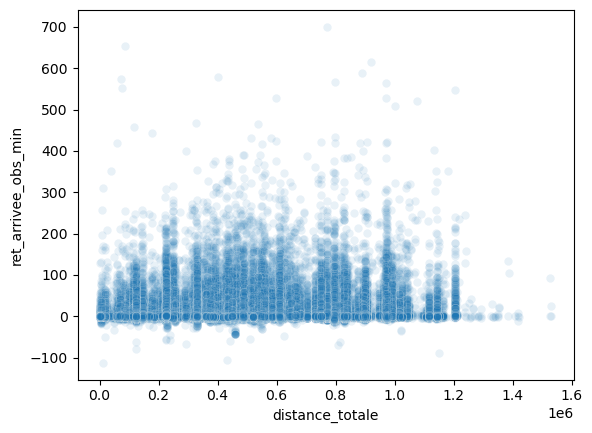

In [142]:
# Taux de retard en fonction de la longueur du trajet (distance_totale)
sns.scatterplot(data=df, x='distance_totale', y='ret_arrivee_obs_min', alpha=0.1)
# constat : la distance ne semble pas être un facteur de retard

Text(500, 450, 'f(x)=x')

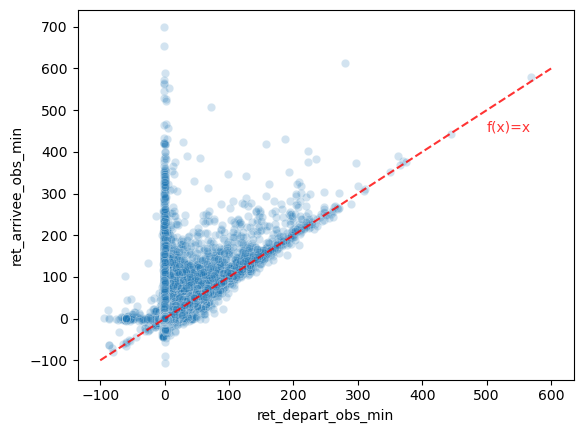

In [143]:
# Retard à l'arrivée en fonction du retard au départ
sns.scatterplot(data=df[df['ret_depart_obs_min'] > -100], x='ret_depart_obs_min', y='ret_arrivee_obs_min', alpha=0.2)
# constat : 
# - ligne verticale à x=0 : trains l'heure au départ, mais avec du retard à l'arrivée 
# - droite oblique : les trains qui ont conservé leur retard initial, voire légèrement gagné du temps sur leur retard.
# - entre les deux : les trains qui ont pris du retard EN PLUS de leur retard initial.

# trace f(x) = x
plt.plot([-100, 600], [-100, 600], color='red', linestyle='--', alpha=0.8)
plt.text(500, 450, "f(x)=x", color='red', alpha=0.8)